In [137]:
import numpy as np
import matplotlib.pyplot as plt
import time
# 读入训练数据
train = np.loadtxt('01Gradient_data.csv', delimiter=',', skiprows=1)
x = train[:, 0]  #轴0   不是np对应的轴0是横轴之类的  轴0就是轴0 
y = train[:, 1]
x


array([235., 216., 148.,  35.,  85., 204.,  40.,  49.,  25., 173., 191.,
       134.,  99., 117., 112., 162., 272., 159., 159.,  59., 198.])

In [138]:
y

array([567., 553., 417., 310., 308., 517., 325., 325., 332., 498., 498.,
       392., 334., 385., 387., 425., 659., 400., 427., 319., 522.])

In [139]:
mu=x.mean()
sigma=x.std()


第1次更新:theta0=9.165,theta1=2.103,差值=82011.1340
第2次更新:theta0=17.872,theta1=4.004,差值=78602.8333
第3次更新:theta0=26.397,theta1=5.866,差值=75336.1782
第4次更新:theta0=34.743,theta1=7.688,差值=72205.2819
第5次更新:theta0=42.913,theta1=9.473,差值=69204.5026
第6次更新:theta0=50.912,theta1=11.219,差值=66328.4327
第7次更新:theta0=58.743,theta1=12.929,差值=63571.8894
第8次更新:theta0=66.409,theta1=14.603,差值=60929.9052
第9次更新:theta0=73.914,theta1=16.242,差值=58397.7193
第10次更新:theta0=81.262,theta1=17.847,差值=55970.7685
第11次更新:theta0=88.456,theta1=19.418,差值=53644.6793
第12次更新:theta0=95.498,theta1=20.956,差值=51415.2601
第13次更新:theta0=102.393,theta1=22.461,差值=49278.4933
第14次更新:theta0=109.142,theta1=23.935,差值=47230.5284
第15次更新:theta0=115.750,theta1=25.378,差值=45267.6748
第16次更新:theta0=122.220,theta1=26.791,差值=43386.3956
第17次更新:theta0=128.553,theta1=28.174,差值=41583.3003
第18次更新:theta0=134.753,theta1=29.528,差值=39855.1400
第19次更新:theta0=140.824,theta1=30.853,差值=38198.8002
第20次更新:theta0=146.766,theta1=32.151,差值=36611.2963
第21次更新:theta0=152.584,theta

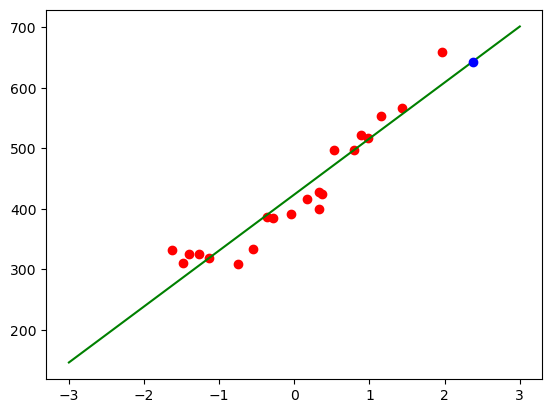

In [140]:
def standardize(x):
    return (x - mu) / sigma


z = standardize(x)

# 初始化参数
theta0 = np.random.rand()
theta1 = np.random.rand()


# 定义假设函数
def f(x):  #模型
    return theta0 + theta1 * x


# 定义误差函数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)


# 学习率
ETA = 1e-3
diff = 1
count = 0


error = E(z, y)
while diff > 1e-2:
    f_z = f(z)  # 计算一次f(z)
    residuals = f_z - y  # 计算残差
    grad0 = np.sum(residuals)
    grad1 = np.sum(residuals * z)

    theta0 -= ETA * grad0
    theta1 -= ETA * grad1

    current_error = E(z, y)
    diff = error - current_error
    error = current_error
    count += 1
    print(f"第{count}次更新:theta0={theta0:.3f},theta1={theta1:.3f},差值={diff:.4f}")

# 默认预测值
value = 300.0
v = standardize(value)
prediction = f(v)
print(f"您广告效果预测值: {prediction:.3f}")

# 绘图
x_vals = np.linspace(-3, 3, 1000)
plt.plot(z, y, 'ro')
plt.plot(x_vals, f(x_vals), 'g-')
plt.plot(v, prediction, 'bo')  # 绘制预测点，蓝色圆点

plt.show()



标准化的目的是使数据具有零均值和单位方差，这有助于加速梯度下降算法的收敛，并且有助于避免数值计算中的问题。

In [141]:
#初始化多项式参数——以下为多项式回归
theta = np.random.rand(3) 
theta#当一维向量与二维矩阵进行点积时，NumPy会根据矩阵的形状自动确定一维向量的角色（行向量或列向量）。 

array([0.05754034, 0.53052694, 0.95632555])

In [142]:
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x ** 2]).T#np.ones 创建一个与x长度相同的全是1的数组，vstack就是将三个数组堆在一起 形成二维数组  .T转置是行列互换  堆在一起还不能满足第一列是1111   只是满足了第一行是1111  所以进行转置
X = to_matrix(z)
X

array([[ 1.00000000e+00,  1.42666294e+00,  2.03536715e+00],
       [ 1.00000000e+00,  1.15073540e+00,  1.32419197e+00],
       [ 1.00000000e+00,  1.63205262e-01,  2.66359574e-02],
       [ 1.00000000e+00, -1.47783747e+00,  2.18400360e+00],
       [ 1.00000000e+00, -7.51712370e-01,  5.65071487e-01],
       [ 1.00000000e+00,  9.76465378e-01,  9.53484635e-01],
       [ 1.00000000e+00, -1.40522496e+00,  1.97465720e+00],
       [ 1.00000000e+00, -1.27452245e+00,  1.62440746e+00],
       [ 1.00000000e+00, -1.62306250e+00,  2.63433186e+00],
       [ 1.00000000e+00,  5.26267814e-01,  2.76957812e-01],
       [ 1.00000000e+00,  7.87672851e-01,  6.20428521e-01],
       [ 1.00000000e+00, -4.01097677e-02,  1.60879346e-03],
       [ 1.00000000e+00, -5.48397341e-01,  3.00739643e-01],
       [ 1.00000000e+00, -2.86992303e-01,  8.23645821e-02],
       [ 1.00000000e+00, -3.59604814e-01,  1.29315622e-01],
       [ 1.00000000e+00,  3.66520291e-01,  1.34337124e-01],
       [ 1.00000000e+00,  1.96399552e+00

In [143]:
theta

array([0.05754034, 0.53052694, 0.95632555])

In [144]:
def f(x):
    return np.dot(x, theta)

diff=1
x

array([235., 216., 148.,  35.,  85., 204.,  40.,  49.,  25., 173., 191.,
       134.,  99., 117., 112., 162., 272., 159., 159.,  59., 198.])

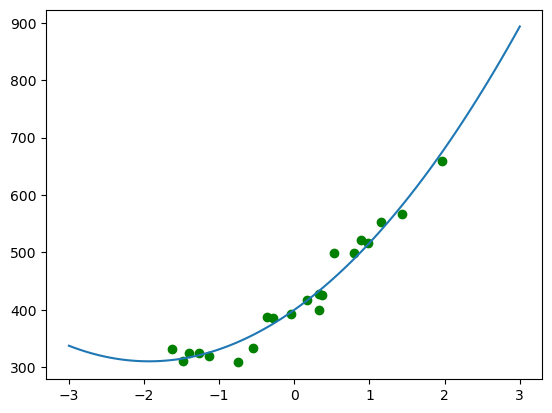

In [145]:

error = E(X, y)  # 计算初始误差值
while diff > 1e-2:  # 当误差差值大于0.01时，继续迭代
    # 计算梯度
    grad = ETA * np.dot(f(X) - y, X)
    # 更新参数
    theta = theta - grad
    # 计算新的误差值
    current_error = E(X, y)
    diff = error - current_error  # 更新两次前后误差值,为了判断是否停止
    error = current_error  # 更新误差值
x=np.linspace(-3, 3, 100)  
plt.plot(z, y, 'go')
plt.plot(x, f(to_matrix(x)))#x值带入 生成一直线 至于数据点 上文已经画过了
plt.show()


In [146]:
# 均方误差
def MSE(x, y):
    return (1/x.shape[0]) * np.sum((y - f(x)) ** 2)
theta = np.random.rand(3)
errors=[]
diff=1
errors.append(MSE(X,y))

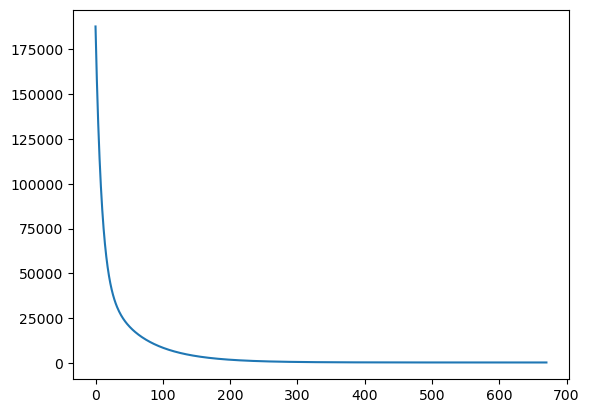

In [147]:
while diff > 1e-2: 
    grad = ETA * np.dot(f(X) - y, X)
    theta = theta - grad
    errors.append(MSE(X,y))
    diff=errors[-2]-errors[-1]
x=np.arange(len(errors))
plt.plot(x, errors)
plt.show()


In [148]:
theta=np.random.rand(3)
errors=[]
diff=1
errors.append(MSE(X,y))
X

array([[ 1.00000000e+00,  1.42666294e+00,  2.03536715e+00],
       [ 1.00000000e+00,  1.15073540e+00,  1.32419197e+00],
       [ 1.00000000e+00,  1.63205262e-01,  2.66359574e-02],
       [ 1.00000000e+00, -1.47783747e+00,  2.18400360e+00],
       [ 1.00000000e+00, -7.51712370e-01,  5.65071487e-01],
       [ 1.00000000e+00,  9.76465378e-01,  9.53484635e-01],
       [ 1.00000000e+00, -1.40522496e+00,  1.97465720e+00],
       [ 1.00000000e+00, -1.27452245e+00,  1.62440746e+00],
       [ 1.00000000e+00, -1.62306250e+00,  2.63433186e+00],
       [ 1.00000000e+00,  5.26267814e-01,  2.76957812e-01],
       [ 1.00000000e+00,  7.87672851e-01,  6.20428521e-01],
       [ 1.00000000e+00, -4.01097677e-02,  1.60879346e-03],
       [ 1.00000000e+00, -5.48397341e-01,  3.00739643e-01],
       [ 1.00000000e+00, -2.86992303e-01,  8.23645821e-02],
       [ 1.00000000e+00, -3.59604814e-01,  1.29315622e-01],
       [ 1.00000000e+00,  3.66520291e-01,  1.34337124e-01],
       [ 1.00000000e+00,  1.96399552e+00

X[p, :]:

X 是一个二维数组，p 是一个包含随机排列索引的数组。
X[p, :] 表示对 X 的行进行重新排列，顺序由 p 指定。
例如，如果 p = [2, 0, 1]，那么 X[p, :] 将产生一个新数组，其中第 0 行是原数组的第 2 行，第 1 行是原数组的第 0 行，第 2 行是原数组的第 1 行。
train_y[p]:

train_y 是一个一维数组，p 是一个包含随机排列索引的数组。
train_y[p] 表示对 train_y 的元素进行重新排列，顺序由 p 指定。
例如，如果 p = [2, 0, 1]，那么 train_y[p] 将产生一个新数组，其中第 0 个元素是原数组的第 2 个元素，第 1 个元素是原数组的第 0 个元素，第 2 个元素是原数组的第 1 个元素。
zip(X[p, :], train_y[p]):

zip 函数将两个可迭代对象（在这里是 X[p, :] 和 train_y[p]）合并成一个迭代器，迭代器的每个元素是一个元组，元组的第一个元素来自 X[p, :]，第二个元素来自 train_y[p]。
for x, y in zip(X[p, :], train_y[p]):

这个循环通过 zip 生成的迭代器进行迭代，每次迭代都会将 X[p, :] 的一行赋值给 x，将 train_y[p] 的一个元素赋值给 y。
这样，x 和 y 会对应于同一个随机排列索引下的 X 的一行和 train_y 的一个元素。

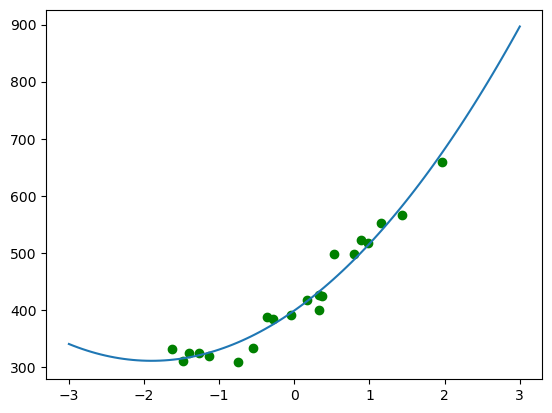

In [149]:
while diff>1e-2:
    p=np.random.permutation(X.shape[0])  #x可以是一个整数或一个数组。如果是整数，则生成一个从 0 到 x-1 的随机排列。如果是数组，则对数组的元素进行随机排列。p.random.permutation 生成的随机数不会重复。具体来说，第一维打乱 ，行与行之间打乱，不影响行的内部顺序 不是整个数组所有打乱
    #X[p, :] 的意思是：从 X 中提取 p 指定的行，并保留所有列。
    #p 是一个索引数组，指定了要提取的行的顺序。   不仅指定了要提取哪些行，还指定了顺序
    
    for x_i, y_i in zip(X[p,:], y[p]):
        theta = theta - ETA * (f(x_i) - y_i) * x_i   #x又做训练数据又做循环变量，出错了
        
    errors.append(MSE(X,y))
    diff=errors[-2]-errors[-1]
x=np.linspace(-3, 3, 100)
plt.plot(z, y, 'go')
plt.plot(x, f(to_matrix(x)))
plt.show()
